#**Imports**

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go

In [2]:
from scipy import stats

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb


In [4]:
from sklearn.model_selection import cross_val_score


In [5]:
titanic = sns.load_dataset('titanic')
df = pd.DataFrame(titanic)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# **Tratamentos dos dados**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
missing_values = df.isnull().sum()
unique_values = df.nunique()

missing_unique_df = pd.DataFrame({'Missing Values': missing_values, 'Unique Values': unique_values})

missing_unique_df.head(20)

,Missing Values,Unique Values
survived,0,2
pclass,0,3
sex,0,2
age,177,88
sibsp,0,7
parch,0,7
fare,0,248
embarked,2,3
class,0,3
who,0,3


In [8]:
df = df.drop(columns=['deck', 'alive','pclass'])
df = df.dropna(subset=['age','embark_town'])

In [9]:
missing_values = df.isnull().sum()
unique_values = df.nunique()

missing_unique_df = pd.DataFrame({'Missing Values': missing_values, 'Unique Values': unique_values})

missing_unique_df.head(20)

,Missing Values,Unique Values
survived,0,2
sex,0,2
age,0,88
sibsp,0,6
parch,0,7
fare,0,219
embarked,0,3
class,0,3
who,0,3
adult_male,0,2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     712 non-null    int64   
 1   sex          712 non-null    object  
 2   age          712 non-null    float64 
 3   sibsp        712 non-null    int64   
 4   parch        712 non-null    int64   
 5   fare         712 non-null    float64 
 6   embarked     712 non-null    object  
 7   class        712 non-null    category
 8   who          712 non-null    object  
 9   adult_male   712 non-null    bool    
 10  embark_town  712 non-null    object  
 11  alone        712 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(3), object(4)
memory usage: 57.8+ KB


In [11]:
df.describe()


,survived,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,29.642093,0.514045,0.432584,34.567251
std,0.491139,14.492933,0.930692,0.854181,52.938648
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,80.000000,5.000000,6.000000,512.329200


In [12]:
for column in df.columns:
    if column not in ['survived']:
        fig = px.histogram(df, x=column, color='survived', barmode='group',
                           title=f'Histograma de {column} em relação à sobrevivência',
                           category_orders={'survived': { 'Não Sobreviveu': 0, 'Sobreviveu':1 }},
                           color_discrete_map={0: 'red', 1: 'green'})
        fig.update_layout(xaxis_title=column, yaxis_title='Frequência', legend_title='Sobrevivência')
        fig.show()


In [13]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Valores únicos para a coluna "{column}": {unique_values}')


Valores únicos para a coluna "survived": [0 1]
Valores únicos para a coluna "sex": ['male' 'female']
Valores únicos para a coluna "age": [22.   38.   26.   35.   54.    2.   27.   14.    4.   58.   20.   39.
 55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.   18.
  3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.   16.
 25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.   14.5
 70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.   56.
 50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.   60.
 10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.    0.67
 30.5   0.42 34.5  74.  ]
Valores únicos para a coluna "sibsp": [1 0 3 4 2 5]
Valores únicos para a coluna "parch": [0 1 2 5 3 4 6]
Valores únicos para a coluna "fare": [  7.25    71.2833   7.925   53.1      8.05    51.8625  21.075   11.1333
  30.0708  16.7     26.55    31.275    7.8542  16.      29.125   18.
  26.      13.       8.0292  35.5     31.3875 263.  

In [14]:
categorical_cols = ['sex', 'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alone']

mapping_dict = {}

for column in categorical_cols:
    unique_values = df[column].unique()
    mapping = {val: idx for idx, val in enumerate(unique_values)}
    mapping_dict[column] = mapping
    df[column] = df[column].map(mapping)

for col, mapping in mapping_dict.items():
    print(f'Mapeamento para a coluna "{col}": {mapping}')


Mapeamento para a coluna "sex": {'male': 0, 'female': 1}
Mapeamento para a coluna "embarked": {'S': 0, 'C': 1, 'Q': 2}
Mapeamento para a coluna "class": {'Third': 0, 'First': 1, 'Second': 2}
Mapeamento para a coluna "who": {'man': 0, 'woman': 1, 'child': 2}
Mapeamento para a coluna "adult_male": {True: 0, False: 1}
Mapeamento para a coluna "embark_town": {'Southampton': 0, 'Cherbourg': 1, 'Queenstown': 2}
Mapeamento para a coluna "alone": {False: 0, True: 1}


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     712 non-null    int64   
 1   sex          712 non-null    int64   
 2   age          712 non-null    float64 
 3   sibsp        712 non-null    int64   
 4   parch        712 non-null    int64   
 5   fare         712 non-null    float64 
 6   embarked     712 non-null    int64   
 7   class        712 non-null    category
 8   who          712 non-null    int64   
 9   adult_male   712 non-null    int64   
 10  embark_town  712 non-null    int64   
 11  alone        712 non-null    int64   
dtypes: category(1), float64(2), int64(9)
memory usage: 67.6 KB


In [16]:
df['class'] = df['class'].astype(int)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     712 non-null    int64  
 1   sex          712 non-null    int64  
 2   age          712 non-null    float64
 3   sibsp        712 non-null    int64  
 4   parch        712 non-null    int64  
 5   fare         712 non-null    float64
 6   embarked     712 non-null    int64  
 7   class        712 non-null    int64  
 8   who          712 non-null    int64  
 9   adult_male   712 non-null    int64  
 10  embark_town  712 non-null    int64  
 11  alone        712 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 72.3 KB


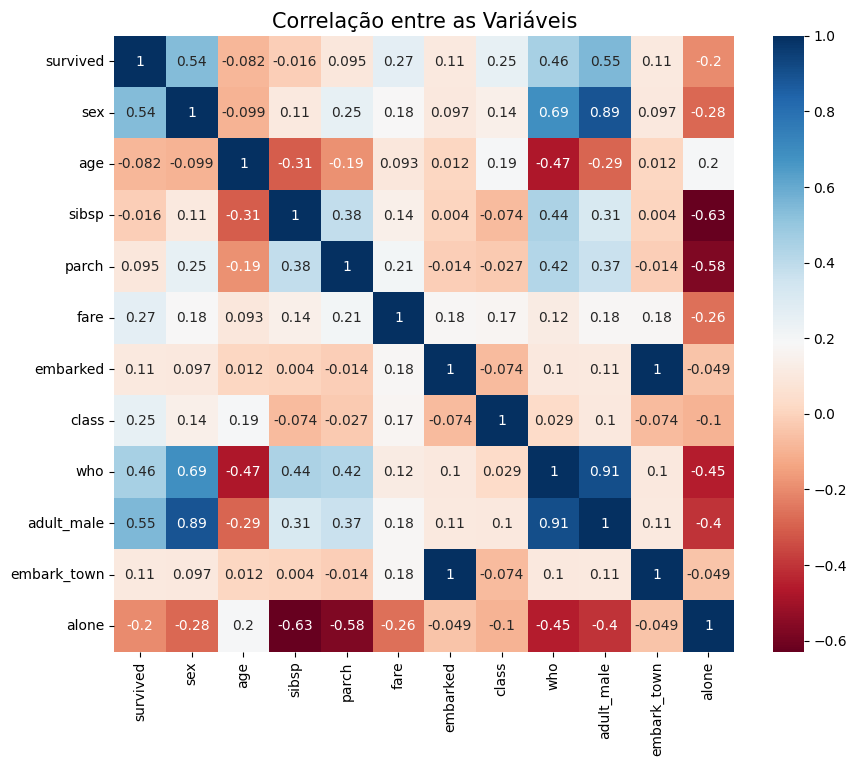

In [18]:
num_cols = df.select_dtypes(include=['int64', 'float64'])
corr = num_cols.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True, cmap="RdBu")
plt.title("Correlação entre as Variáveis", size=15)
plt.show()

In [19]:
numeric_cols = ['age', 'fare']


In [20]:
fig = go.Figure()

for col in numeric_cols:
    fig.add_trace(go.Box(y=df[col], name=col, boxpoints='outliers'))

fig.update_layout(title='Boxplot das Variáveis Numéricas', height=600, width=1000)
fig.show()


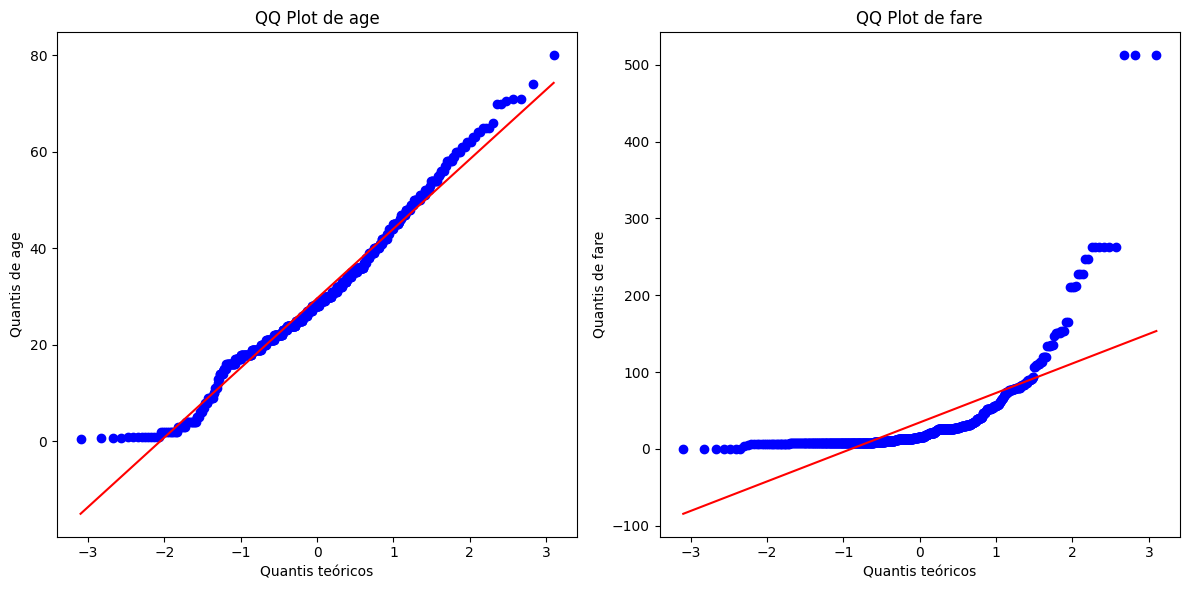

In [21]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 2, i)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'QQ Plot de {col}')
    plt.xlabel('Quantis teóricos')
    plt.ylabel(f'Quantis de {col}')
plt.tight_layout()
plt.show()

In [22]:
fig = px.scatter_matrix(df, dimensions=["sex", "age", "sibsp", "parch", 'fare', 'embarked','class','who','adult_male', 'embark_town','alone'],
                        color="survived", height=1200)
fig.show()

# **Predição de Sobrevivência**

In [23]:
X = df.drop('survived', axis=1)
y = df['survived']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Decision Tree

In [25]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_predictions = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)

In [26]:
dt_fp = np.sum((dt_predictions == 1) & (y_test == 0))
dt_fn = np.sum((dt_predictions == 0) & (y_test == 1))

In [27]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [dt_accuracy, dt_precision, dt_recall, dt_f1]

df_dt = pd.DataFrame({'Metrics': metrics, 'Scores': scores})

fig = px.bar(df_dt, x='Metrics', y='Scores', color='Scores',
             color_continuous_scale='greens',
             labels={'Scores': 'Score'}, height=400)
fig.update_layout(title='Decision Tree Classifier Metrics',
                  xaxis_title='Metrics',
                  yaxis_title='Score')
fig.show()

# Logistic Regression

In [28]:
lr_model = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear')
lr_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)

In [29]:
lr_fp = np.sum((lr_predictions == 1) & (y_test == 0))
lr_fn = np.sum((lr_predictions == 0) & (y_test == 1))


In [30]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [lr_accuracy, lr_precision, lr_recall, lr_f1]

df_lr = pd.DataFrame({'Metrics': metrics, 'Scores': scores})

df_lr = px.bar(df_lr, x='Metrics', y='Scores', color='Scores',
             color_continuous_scale='greens',
             labels={'Scores': 'Score'}, height=400)
df_lr.update_layout(title='Decision Tree Classifier Metrics',
                  xaxis_title='Metrics',
                  yaxis_title='Score')
df_lr.show()

#  Random Forest


In [31]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)


In [32]:
rf_fp = np.sum((rf_predictions == 1) & (y_test == 0))
rf_fn = np.sum((rf_predictions == 0) & (y_test == 1))

In [33]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [rf_accuracy, rf_precision, rf_recall, rf_f1]

df_rf = pd.DataFrame({'Metrics': metrics, 'Scores': scores})

df_rf = px.bar(df_rf, x='Metrics', y='Scores', color='Scores',
             color_continuous_scale='greens',
             labels={'Scores': 'Score'}, height=400)
df_rf.update_layout(title='RandomForestClassifier Metrics',
                  xaxis_title='Metrics',
                  yaxis_title='Score')
df_rf.show()

# XGBoost

In [34]:
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

xgb_predictions = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions)
xgb_recall = recall_score(y_test, xgb_predictions)
xgb_f1 = f1_score(y_test, xgb_predictions)

In [35]:
xgb_fp = np.sum((xgb_predictions == 1) & (y_test == 0))
xgb_fn = np.sum((xgb_predictions == 0) & (y_test == 1))

In [36]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1]

df_xg = pd.DataFrame({'Metrics': metrics, 'Scores': scores})

df_xg = px.bar(df_xg, x='Metrics', y='Scores', color='Scores',
             color_continuous_scale='greens',
             labels={'Scores': 'Score'}, height=400)
df_xg.update_layout(title='XGBClassifier Metrics',
                  xaxis_title='Metrics',
                  yaxis_title='Score')
df_xg.show()

# Comparação entre os Modelos

In [37]:
models = ['Decision Tree', 'Logistic Regression', 'Random Forest', 'XGBoost']
fps = [dt_fp, lr_fp, rf_fp, xgb_fp]
fns = [dt_fn, lr_fn, rf_fn, xgb_fn]

df_false_predictions = pd.DataFrame({'Model': models, 'False Positives': fps, 'False Negatives': fns})

In [38]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_false_predictions['Model'],
    y=df_false_predictions['False Positives'],
    name='False Positives',

))

fig.add_trace(go.Bar(
    x=df_false_predictions['Model'],
    y=df_false_predictions['False Negatives'],
    name='False Negatives',

))

fig.update_layout(title='False Positives and False Negatives for Each Model',
                  xaxis_title='Model',
                  yaxis_title='Count',
                  barmode='group',
                  height=600, width=1000)
fig.show()


In [39]:
df_metrics = pd.DataFrame({
    'Model': ['Decision Tree', 'Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [dt_accuracy, lr_accuracy, rf_accuracy, xgb_accuracy],
    'Precision': [dt_precision, lr_precision, rf_precision, xgb_precision],
    'Recall': [dt_recall, lr_recall, rf_recall, xgb_recall],
    'F1 Score': [dt_f1, lr_f1, rf_f1, xgb_f1]
})
df_metrics_sorted = df_metrics.sort_values(by='Accuracy', ascending=False)

df_metrics_sorted

,Model,Accuracy,Precision,Recall,F1 Score
1,Logistic Regression,0.811189,0.810345,0.746032,0.776860
3,XGBoost,0.755245,0.741379,0.682540,0.710744
2,Random Forest,0.741259,0.716667,0.682540,0.699187
0,Decision Tree,0.706294,0.690909,0.603175,0.644068


In [40]:
def cross_validate_model(model, X, y, cv=5, scoring='accuracy'):
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
    mean_cv_score = cv_scores.mean()
    std_cv_score = cv_scores.std()
    return mean_cv_score, std_cv_score

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, solver='liblinear'),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42)
}

cv_results = {}

for model_name, model in models.items():
    mean_score, std_score = cross_validate_model(model, X, y)
    cv_results[model_name] = {'Mean Accuracy': mean_score, 'Std Deviation': std_score}

cv_results_df = pd.DataFrame.from_dict(cv_results, orient='index')
cv_results_df.sort_values(by='Mean Accuracy', ascending=False, inplace=True)
cv_results_df


,Mean Accuracy,Std Deviation
Logistic Regression,0.810371,0.032219
XGBoost,0.799163,0.038515
Random Forest,0.792170,0.033184
Decision Tree,0.762671,0.018591


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     712 non-null    int64  
 1   sex          712 non-null    int64  
 2   age          712 non-null    float64
 3   sibsp        712 non-null    int64  
 4   parch        712 non-null    int64  
 5   fare         712 non-null    float64
 6   embarked     712 non-null    int64  
 7   class        712 non-null    int64  
 8   who          712 non-null    int64  
 9   adult_male   712 non-null    int64  
 10  embark_town  712 non-null    int64  
 11  alone        712 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 72.3 KB


In [42]:
from ipywidgets import interact, widgets
from IPython.display import clear_output

import joblib

In [43]:
def predict_survival(sex, age, sibsp, parch, fare, embarked, _class, who, adult_male, embark_town, alone):
    example = [[sex, age, sibsp, parch, fare, embarked, _class, who, adult_male, embark_town, alone]]
    predicted_survival = lr_model.predict(example)
    return "Survived" if predicted_survival[0] == 1 else "Did not survive"

sex_widget = widgets.Dropdown(options=mapping_dict['sex'], description="Sex:")
age_widget = widgets.FloatSlider(min=0, max=100, value=30, description="Age:")
sibsp_widget = widgets.IntSlider(min=0, max=10, value=0, description="Siblings/Spouses:")
parch_widget = widgets.IntSlider(min=0, max=10, value=0, description="Parents/Children:")
fare_widget = widgets.FloatSlider(min=0, max=100, value=20, description="Fare:")
embarked_widget = widgets.Dropdown(options=mapping_dict['embarked'], description="Embarked:")
class_widget = widgets.Dropdown(options=mapping_dict['class'], description="Class:")
who_widget = widgets.Dropdown(options=mapping_dict['who'], description="Who:")
adult_male_widget = widgets.Dropdown(options=mapping_dict['adult_male'], description="Adult Male:")
embark_town_widget = widgets.Dropdown(options=mapping_dict['embark_town'], description="Embark Town:")
alone_widget = widgets.Dropdown(options=mapping_dict['alone'], description="Alone:")

def show_prediction(button):
    with out:
        clear_output(wait=True)
        print("Predicted survival: ", predict_survival(
            sex=sex_widget.value,
            age=age_widget.value,
            sibsp=sibsp_widget.value,
            parch=parch_widget.value,
            fare=fare_widget.value,
            embarked=embarked_widget.value,
            _class=class_widget.value,
            who=who_widget.value,
            adult_male=adult_male_widget.value,
            embark_town=embark_town_widget.value,
            alone=alone_widget.value
        ))

predict_button = widgets.Button(description="Predict Survival")
predict_button.on_click(show_prediction)

out = widgets.Output()

widgets.VBox([
    sex_widget,
    age_widget,
    sibsp_widget,
    parch_widget,
    fare_widget,
    embarked_widget,
    class_widget,
    who_widget,
    adult_male_widget,
    embark_town_widget,
    alone_widget,
    predict_button,
    out
])